# Development notebook

My typical workflow is developing new features in a notebook (like this one) and moving things over to the package files. Working like this makes iterating on the API extremely quick while I iterate on the implementations in my text editor (VS Code).

Let this serve as some examples as well!

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tufty as tft

## Datasets

Grab a dataset for demonstration a development.

In [3]:
iris = tft.datasets.iris()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Scatter plots
Time to show off how to make a faster scatter plot. Create a `Plot` with the iris DataFrame and call the `scatter` method. This method takes columns from the dataset.

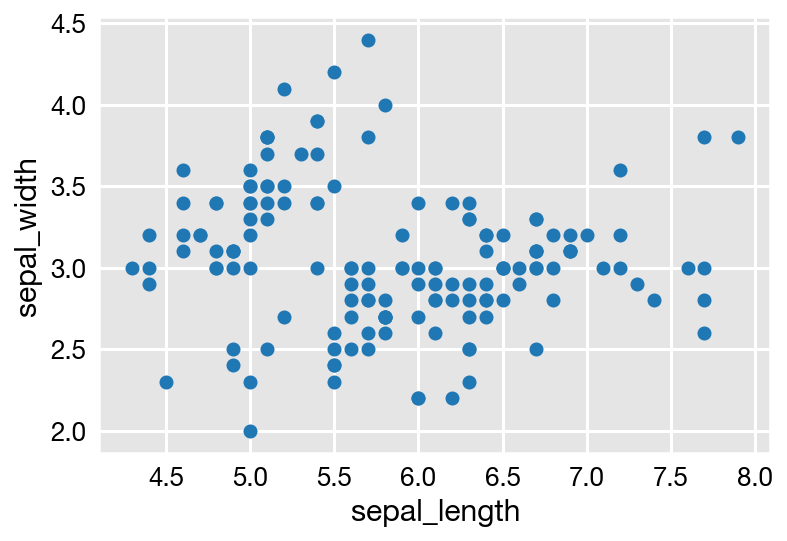

In [4]:
plot = tft.Plot(iris).scatter('sepal_length', 'sepal_width')

## Color
Should be able to set the color for all the points, but also color by one of the columns in the DataFrame.

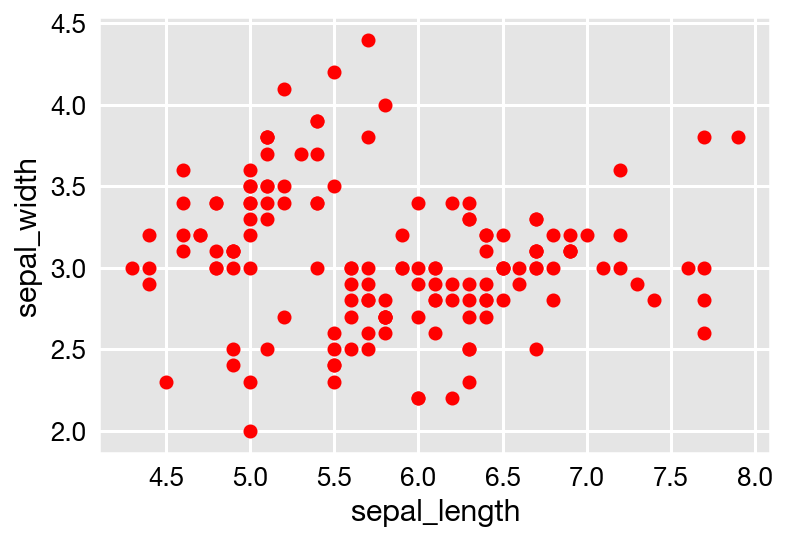

In [5]:
plot = tft.Plot(iris).scatter('sepal_length', 'sepal_width', color='red')

### Color By Categorical Feature

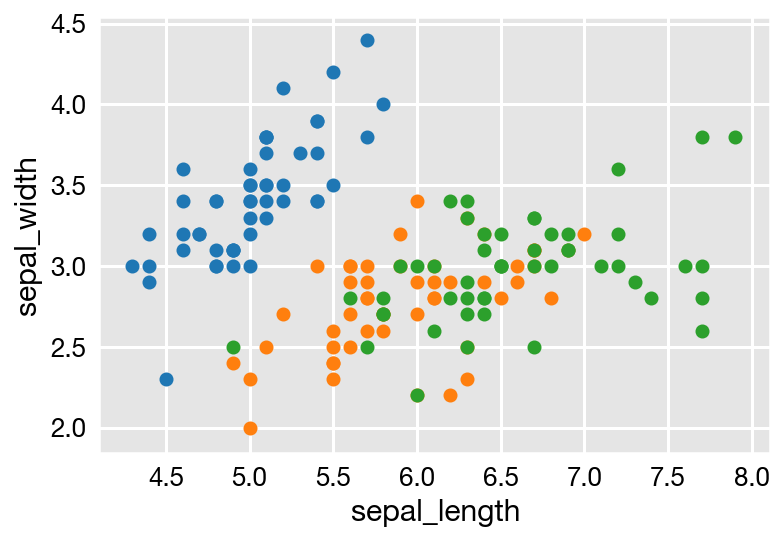

In [17]:
plot = tft.Plot(iris).scatter('sepal_length', 'sepal_width', color='species')

### Color By Numerical Feature

tufty.Plot

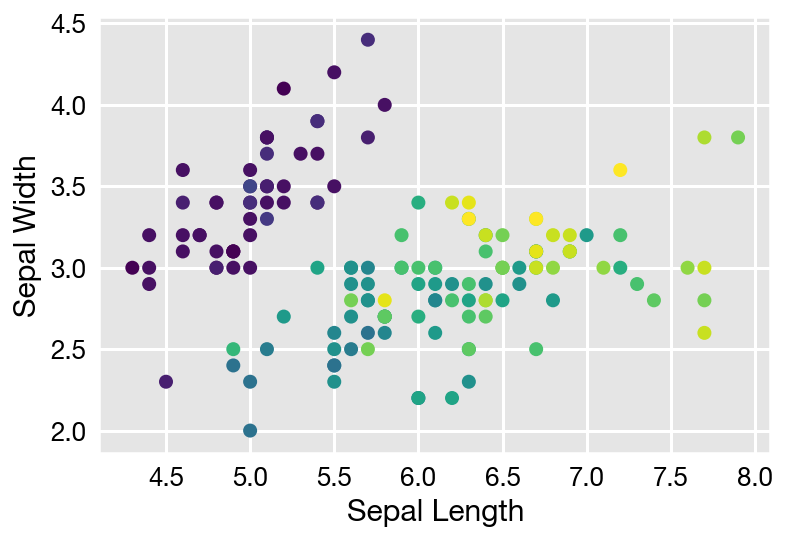

In [19]:
plot = tft.Plot(iris).scatter('sepal_length', 'sepal_width', color='petal_width')
plot.labels(x="Sepal Length", y="Sepal Width")

## Axis Labels and Title

Let's make it easy to add a title and axis labels. A legend too!

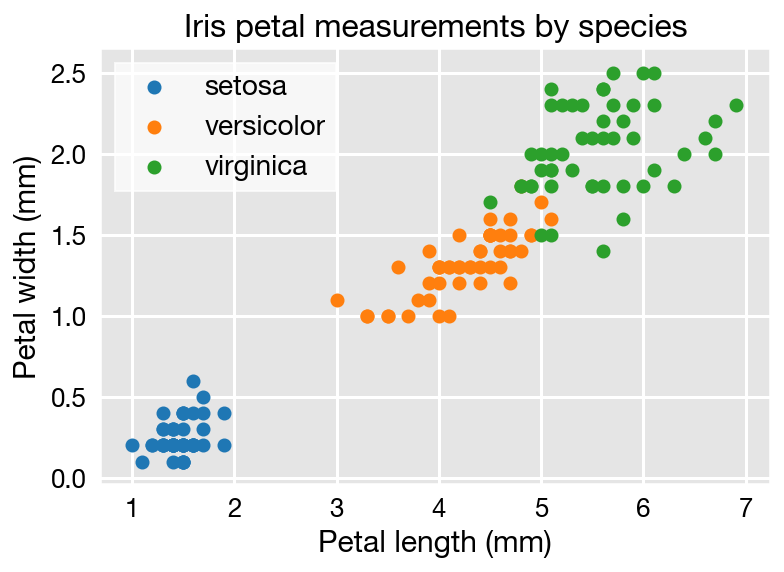

In [7]:
plot = tft.Plot(iris, title="Iris petal measurements by species")
plot.scatter(x='petal_length', y='petal_width', color='species').legend();
plot.labels(x="Petal length (mm)", y="Petal width (mm)");

## Multiple plots in one figure

Often you want multiple plots in the same figure. I wrote a function `subplots` based on `plt.subplots` which I use frequently, but it distributes data to the plots. This example shows using the same DataFrame for both subplots, but `data` can be a list of DataFrames, one for each subplot.

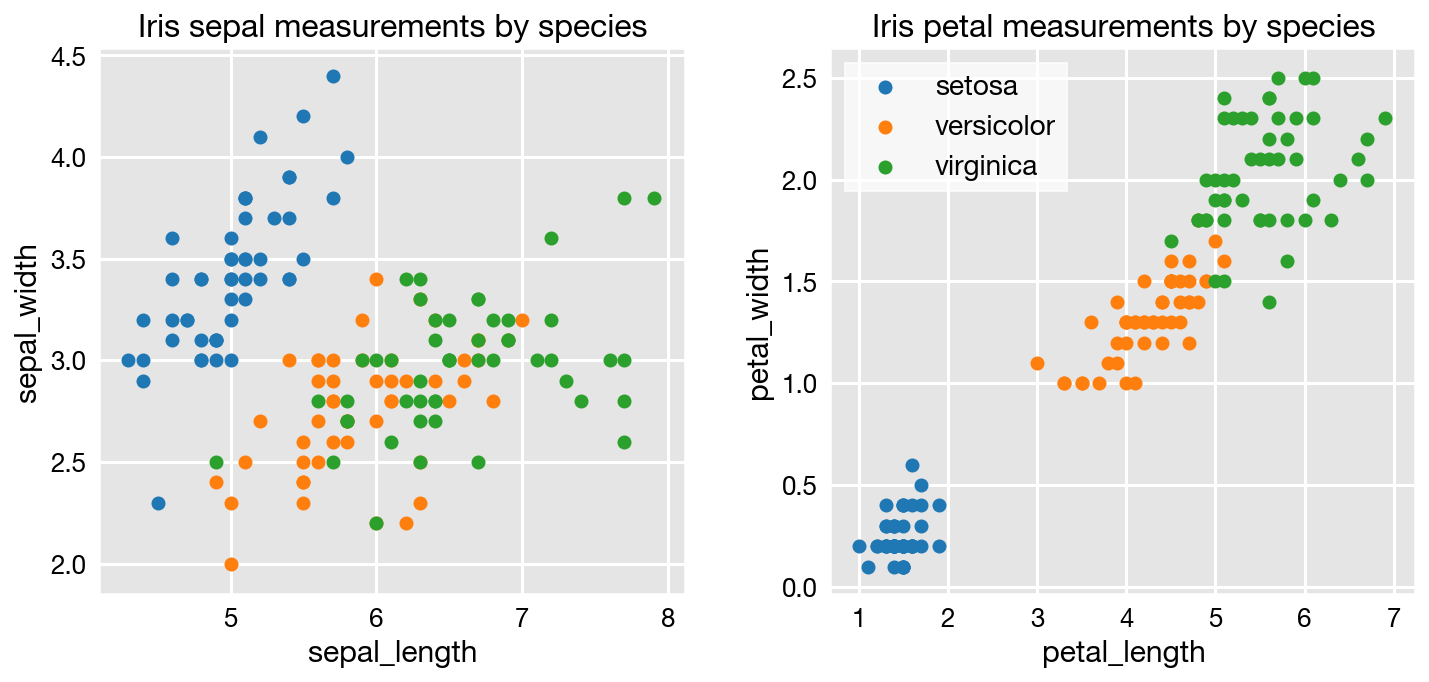

In [8]:
sepal, petal = tft.subplots(data=iris, figsize=(10, 4.5), ncols=2, w_pad=3)
sepal.scatter(x='sepal_length', y='sepal_width', color='species')
sepal.title("Iris sepal measurements by species")

petal.scatter(x='petal_length', y='petal_width', color='species').legend()
petal.title("Iris petal measurements by species");